In [5]:
import pandas as pd
import numpy as np

In [6]:
import os

ROOT = os.getcwd()
WORK_DIR = os.path.dirname(ROOT)

In [7]:
from sklearn.metrics import accuracy_score

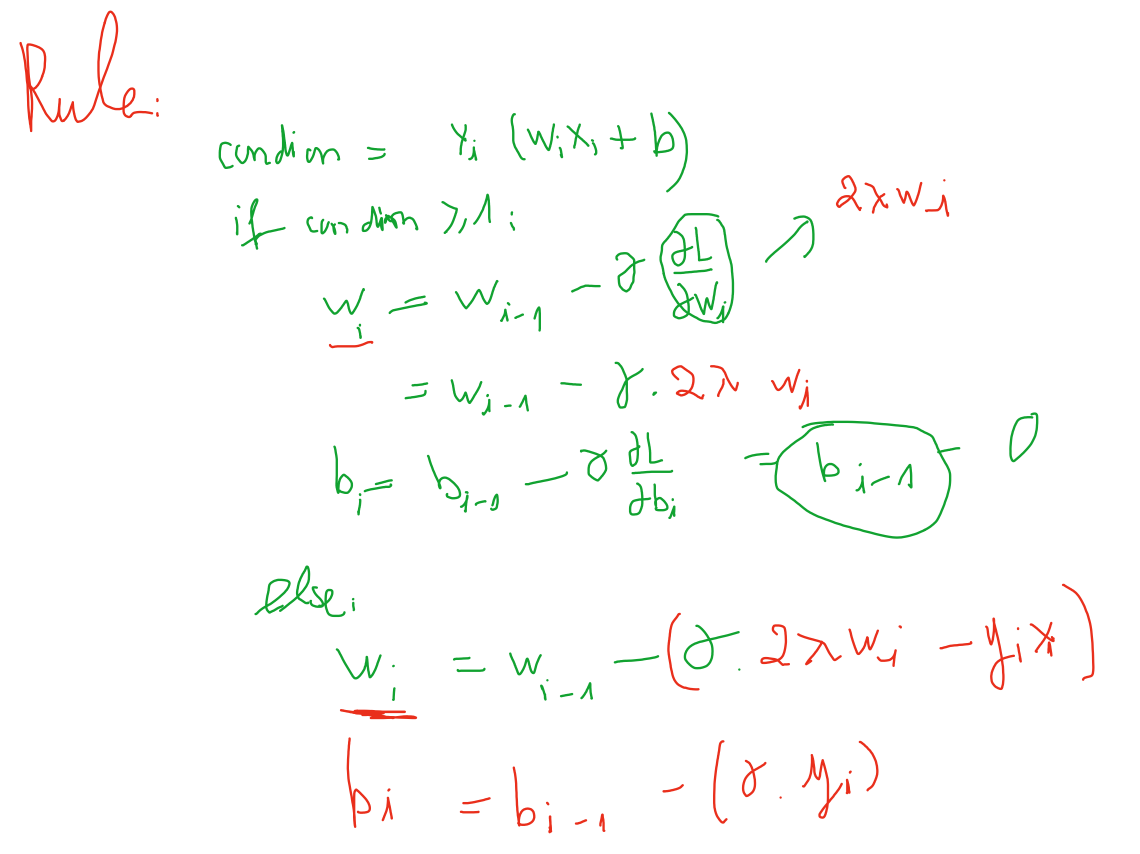

In [8]:
from PIL import Image

Image.open(os.path.join(WORK_DIR, 'images/training.png'))

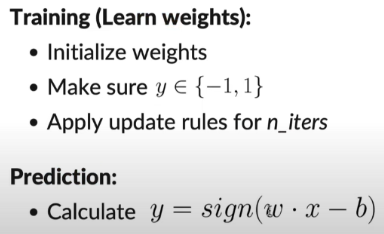

In [9]:
Image.open(os.path.join(WORK_DIR, 'images/pipeline.png'))

1 epoch -> many iteration -> SGD, Batch GD -> Optimization

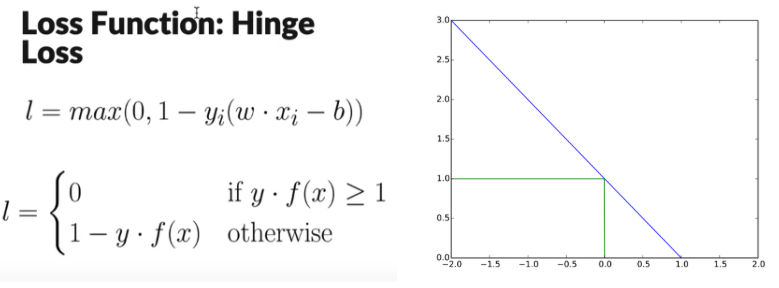

In [14]:
Image.open(os.path.join(WORK_DIR, 'images/loss.png'))

In [66]:
class SVM:
    
    def __init__(self, n_iters=1000, lr=1e-3, lambda_param=1e-2) -> None:
        self.n_iters = n_iters
        self.lr = lr
        self.lambda_param = lambda_param
        self.w = None
        self.b = None
        self.losses = []
        self.mean_losses = []
        
        
    def criteria(self, y, x):
        return max(0, 1 - np.dot(y, (np.dot(x,self.w) - self.b)))    
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights
        self.w = np.zeros(n_features)
        self.b = 0
   
        # Make sure y belonging to {-1, 1}
        y_ = np.where(y <=0, -1 , 1)
        
        # Apply update rules for n_iters
        for _ in range(self.n_iters):
            for i, x in enumerate(X):

                condition = y_[i] * (np.dot(x, self.w) - self.b)
                loss = self.criteria(y_[i], x)
                
                if condition >= 1:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)

                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x, y_[i]))
                    self.b -= self.lr * y_[i]
                
                self.losses.append(loss)
            
            print(f'Loss: {np.mean(self.losses)}')
            self.mean_losses.append(np.mean(self.losses))  
         
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

In [57]:
from sklearn import datasets

data = datasets.load_iris()

target = pd.DataFrame({'Label': data.target.tolist()}, index=range(len(data.target.tolist())))
target.replace({0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}, inplace=True)

features = pd.DataFrame({'sepal_length': data.data[:,0].tolist(), 'sepal_width': data.data[:,1].tolist(),
                         'petal_length': data.data[:,2].tolist(), 'petal_width': data.data[:,-1].tolist()}, index=range(len(data.data[:, 0].tolist())))

df = pd.concat([features, target], axis=1)

In [17]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
def data_preprocessing(X, y):
    df = pd.concat([X, y], axis=1)
    df = df[(df.Label == 'Iris-Setosa') | (df.Label == 'Iris-Versicolour')]
    df.replace({'Iris-Setosa': 0, 'Iris-Versicolour': 1}, inplace=True)
    return df

In [19]:
df_train = data_preprocessing(X_train, y_train)
df_test = data_preprocessing(X_test, y_test)

In [35]:
X_train = df_train.iloc[:, :-1]
X_train = X_train.values
y_train = df_train.Label

X_test = df_test.iloc[:, :-1]
X_test = X_test.values
y_test = df_test.Label

In [67]:
svm = SVM(n_iters=1000, lr=1e-3, lambda_param=1e-2)
svm.fit(X_train, y_train)

Loss: 0.9515077752520389
Loss: 0.8776590434675031
Loss: 0.8023301927654114
Loss: 0.731355197681821
Loss: 0.6645550378891821
Loss: 0.5993340622266243
Loss: 0.539797336010717
Loss: 0.48768529875082123
Loss: 0.44315873609356166
Loss: 0.405329536887359
Loss: 0.3728228303460996
Loss: 0.34503721799165127
Loss: 0.321262719739273
Loss: 0.30066579294513396
Loss: 0.28266511131455196
Loss: 0.2667525409761897
Loss: 0.25261241331727785
Loss: 0.23996239581920978
Loss: 0.2285812913034662
Loss: 0.2182831059165717
Loss: 0.20890425676824753
Loss: 0.20034590245687237
Loss: 0.19248396883919697
Loss: 0.18522524633943413
Loss: 0.17851759139667478
Loss: 0.17227233060554764
Loss: 0.16646789124707378
Loss: 0.16103908353436797
Loss: 0.1559381627935042
Loss: 0.15115653610811353
Loss: 0.14664835443993152
Loss: 0.1423935211791032
Loss: 0.13837182403963588
Loss: 0.13454999623139993
Loss: 0.13096375688218795
Loss: 0.12754878442704046
Loss: 0.12431708112038015
Loss: 0.12126615076012821
Loss: 0.11836043369722311
Loss:

In [68]:
predict = svm.predict(X_test)

In [69]:
accuracy_score(predict, y_test)

0.6363636363636364

In [87]:
X_test = df_test.iloc[:, :-1]
df_predict = pd.DataFrame({'prediction': predict}, index=range(predict.shape[0]))
df_test = pd.concat([X_test, pd.DataFrame(y_test)], axis=1)
df_test = df_test.reset_index()
df = pd.concat([df_test, df_predict], axis=1)

In [88]:
df

,index,sepal_length,sepal_width,petal_length,petal_width,Label,prediction
0,42,4.4,3.2,1.3,0.2,0,-1.0
1,52,6.9,3.1,4.9,1.5,1,1.0
2,6,4.6,3.4,1.4,0.3,0,-1.0
3,12,4.8,3.0,1.4,0.1,0,-1.0
4,71,6.1,2.8,4.0,1.3,1,1.0
5,91,6.1,3.0,4.6,1.4,1,1.0
6,62,6.0,2.2,4.0,1.0,1,1.0
7,80,5.5,2.4,3.8,1.1,1,1.0
8,28,5.2,3.4,1.4,0.2,0,-1.0
9,4,5.0,3.6,1.4,0.2,0,-1.0


In [71]:
loss = pd.DataFrame({'Index': range(len(svm.mean_losses)), 'Loss': svm.mean_losses}, index=range(len(svm.mean_losses)))

<Axes: title={'center': 'Loss of SVM'}, xlabel='Iteration', ylabel='Loss values'>

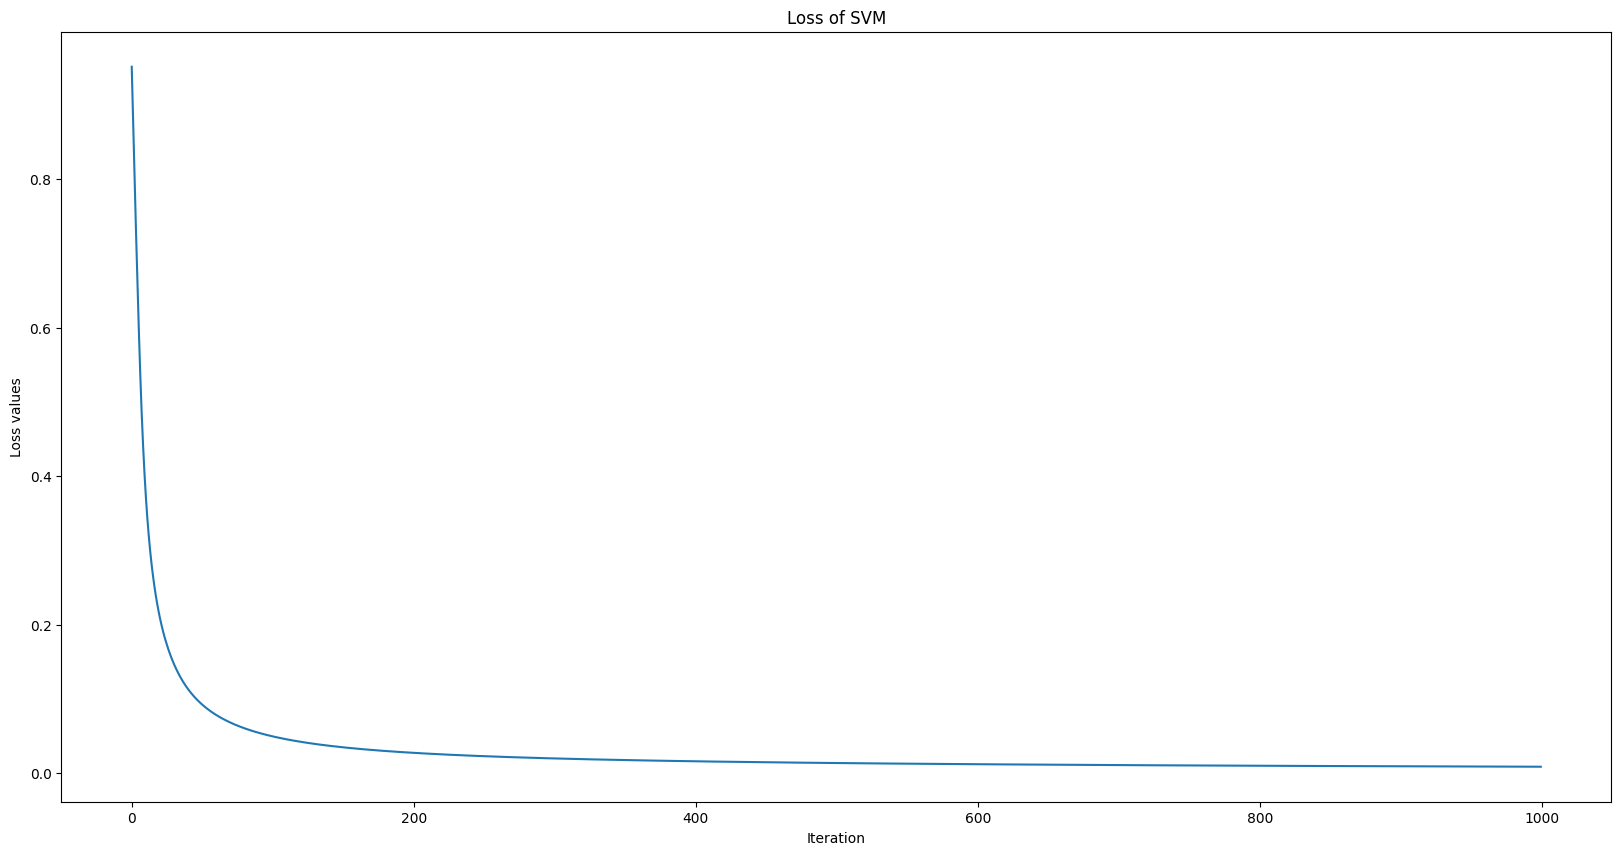

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.title('Loss of SVM')
plt.xlabel('Iteration')
plt.ylabel('Loss values')
sns.lineplot(data=loss, x="Index", y="Loss", orient="y")